In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [60]:
df=pd.read_csv("economic_index_data.csv")

In [61]:
df.head()

,Year,Month,InterestRate,UnemploymentRate,IndexPrice
0,2006,1,9.51,3.41,1418.65
1,2019,12,9.67,5.93,1330.39
2,2014,10,8.18,6.50,1419.59
3,2010,6,3.39,5.44,1649.34
4,2007,12,1.43,10.46,1631.40


In [62]:
#drop unneccessary column
df.drop(columns=['Year','Month'],axis=1,inplace=True)

In [63]:
df.head()

,InterestRate,UnemploymentRate,IndexPrice
0,9.51,3.41,1418.65
1,9.67,5.93,1330.39
2,8.18,6.50,1419.59
3,3.39,5.44,1649.34
4,1.43,10.46,1631.40


In [64]:
df.isnull().sum()

InterestRate        0
UnemploymentRate    0
IndexPrice          0
dtype: int64

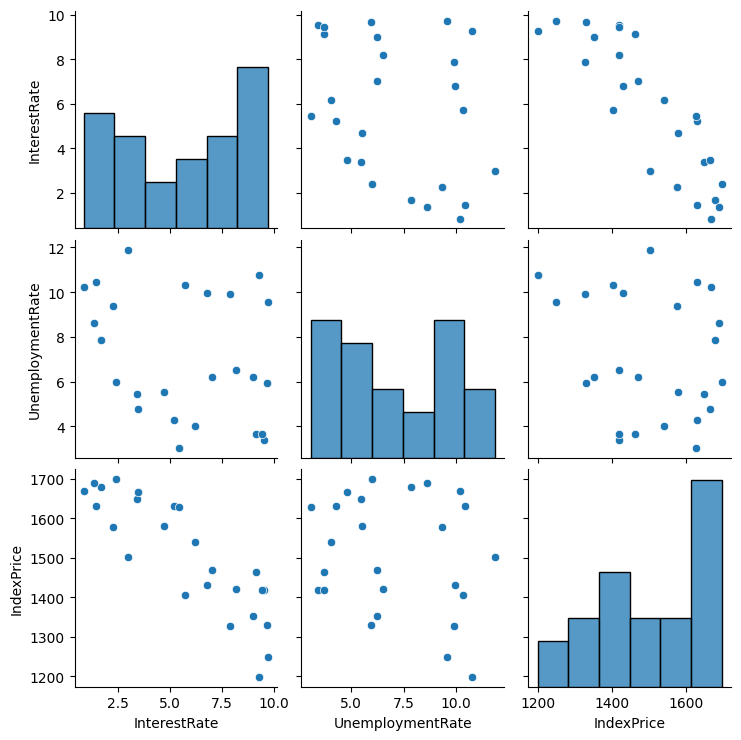

In [65]:
import seaborn as sns
sns.pairplot(df)

In [66]:
df.corr()


,InterestRate,UnemploymentRate,IndexPrice
InterestRate,1.000000,-0.299346,-0.862043
UnemploymentRate,-0.299346,1.000000,-0.207824
IndexPrice,-0.862043,-0.207824,1.000000


In [67]:
#Indpendent and Dependent
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [68]:
y


0     1418.65
1     1330.39
2     1419.59
3     1649.34
4     1631.40
5     1469.63
6     1579.34
7     1679.08
8     1631.36
9     1667.81
10    1462.81
11    1502.36
12    1429.45
13    1664.89
14    1628.53
15    1404.08
16    1577.82
17    1248.55
18    1326.87
19    1418.78
20    1352.41
21    1539.90
22    1198.11
23    1689.57
24    1698.36
Name: IndexPrice, dtype: float64

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=45)

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
from sklearn.linear_model import LinearRegression
regression =LinearRegression()

In [72]:
regression.fit(x_train,y_train)

LinearRegression()

In [73]:
scalar=StandardScaler()

In [74]:
x_train=scalar.fit_transform(x_train,y_train)
x_test=scalar.transform(x_test)

In [75]:
from sklearn.model_selection import cross_val_score
val_scoree=cross_val_score(regression,x_train,y_train,scoring="neg_mean_squared_error",cv=3)

In [76]:
np.mean(val_scoree)

np.float64(-519.8995116089386)

In [77]:
#prediction 
y_pred=regression.predict(x_test)

/home/himamanth/Documents/college stuff/Py projects/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [78]:
y_pred

array([1989.54529526, 1901.8126436 , 2010.50700544, 1922.73565812,
       1859.20721742, 2018.63379366, 1855.93897709, 1917.7330689 ])

In [80]:
#performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

244939.2971433962
481.7979574354477
494.91342388684126


In [81]:
from sklearn.metrics import r2_score
reg= LinearRegression()
reg.fit(x_train,y_train)
Y_pred_p=reg.predict(x_test)
score=r2_score(y_test,y_pred)
print(score*100)

-720.4551640866744


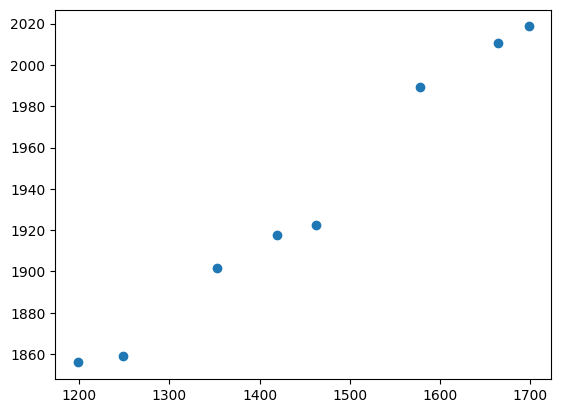

In [82]:
plt.scatter(y_test,y_pred)

In [83]:
residuals=y_test-y_pred
print(residuals)

16   -411.725295
20   -549.402644
13   -345.617005
10   -459.925658
17   -610.657217
24   -320.273794
22   -657.828977
19   -498.953069
Name: IndexPrice, dtype: float64


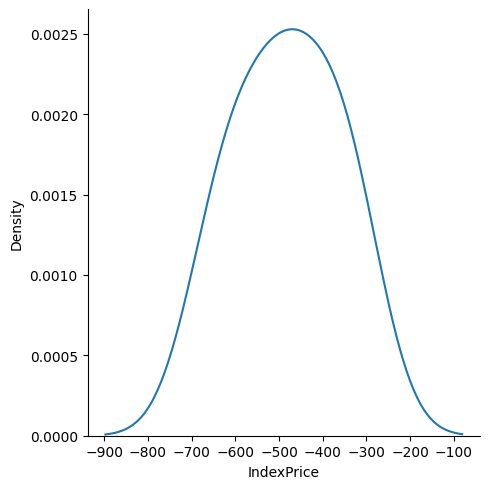

In [84]:
sns.displot(residuals,kind='kde')